In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
!pwd
%cd drive/MyDrive/ML\ Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/content/drive/My Drive/ML Project
[Errno 2] No such file or directory: 'drive/MyDrive/ML Project'
/content/drive/MyDrive/ML Project


In [ ]:
% matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

In [ ]:
# Import the data

url = "./SALES.csv"
df = pd.read_csv(url, header=None)

In [ ]:
# Exploratory data analysis

# View the dimensions of df

print(df.shape)
print(df)

(36, 2)
    Sales  Advertising
0    12.0           15
1    20.5           16
2    21.0           18
3    15.0           27
4    15.3           21
5    23.5           49
6    24.5           21
7    21.3           22
8    23.5           28
9    28.0           36
10   24.0           40
11   15.5            3
12   17.3           21
13   25.3           29
14   25.0           62
15   36.5           65
16   36.5           46
17   29.6           44
18   30.5           33
19   28.0           62
20   26.0           22
21   21.5           12
22   19.7           24
23   19.0            3
24   16.0            5
25   20.7           14
26   26.5           36
27   30.6           40
28   32.3           49
29   29.5            7
30   28.3           52
31   31.3           65
32   32.3           17
33   26.4            5
34   23.4           17
35   16.4            1


In [ ]:
# View the top 5 rows of df

print(df.head())

      0   1
0  12.0  15
1  20.5  16
2  21.0  18
3  15.0  27
4  15.3  21


In [ ]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

In [ ]:
# View the top 5 rows of df with column names renamed

print(df.head())

   Sales  Advertising
0   12.0           15
1   20.5           16
2   21.0           18
3   15.0           27
4   15.3           21


In [ ]:
# View dataframe summary

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes
None


In [ ]:
# View descriptive statistics

print(df.describe())

           Sales  Advertising
count  36.000000    36.000000
mean   24.241667    28.527778
std     6.205867    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


In [ ]:
# Declare feature variable and target variable

X = df['Sales'].values
y = df['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

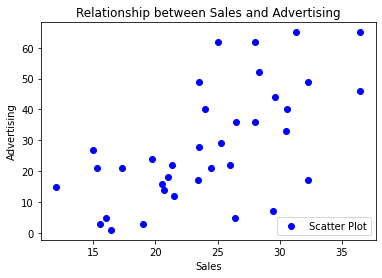

In [ ]:
# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [ ]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)

(36,)
(36,)


In [ ]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)


In [ ]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)


(36, 1)
(36, 1)


In [ ]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [ ]:
# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


In [ ]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

In [ ]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 


Estimated model slope, a: [[1.59091774]]
Estimated model intercept, b: (array([-10.79281735]),)


In [ ]:
# So, our fitted regression line is 

# y = 1.60509347 * x - 11.16003616 

# That is our linear model.

In [ ]:
# Predicting Advertising values

lm.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.

array([[ 8.29819556],
       [21.82099638],
       [22.61645525],
       [13.07094879],
       [13.54822411]])

In [ ]:
# To make an individual prediction using the linear regression model.
arr=np.zeros((1,1))
arr[0][0]=24
print(str(lm.predict(arr)))

[[27.38920847]]


In [ ]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))


RMSE value: 11.2664


In [ ]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))


R2 Score value: 0.5760


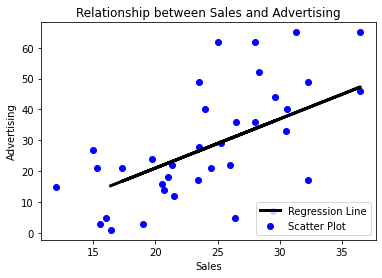

In [ ]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()


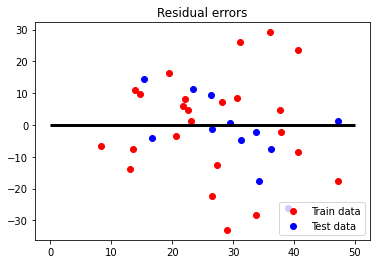

In [ ]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [ ]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.2836
Test set score: 0.5760


In [ ]:
# Save model for future use

from sklearn.externals import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model

# lm2=joblib.load('lm_regressor.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lm_regressor.pkl']